In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

In [5]:
data = pd.read_csv('./RegressionData.csv')
data.head(10)

,X1,X2,y
0,53.766714,1.347397,0.594013
1,183.388501,-1.338226,0.505659
2,-225.884686,-0.800645,0.253316
3,86.217332,-1.343605,0.453381
4,31.876524,1.151258,1.720519
5,-130.768830,-1.556187,0.434455
6,-43.359202,-2.127122,1.032279
7,34.262447,1.105957,1.780675
8,357.839694,-0.846858,0.610009
9,276.943703,0.723174,-0.058932


In [6]:
data.describe()

,X1,X2,y
count,1000.000000,1000.000000,1000.000000
mean,-3.263196,0.073797,0.996858
std,99.896532,1.997194,0.791569
min,-323.203780,-6.144331,-0.650879
25%,-71.263595,-1.240731,0.331548
50%,-3.043251,0.099402,0.947372
75%,61.056271,1.347746,1.649241
max,357.839694,7.139736,3.325075


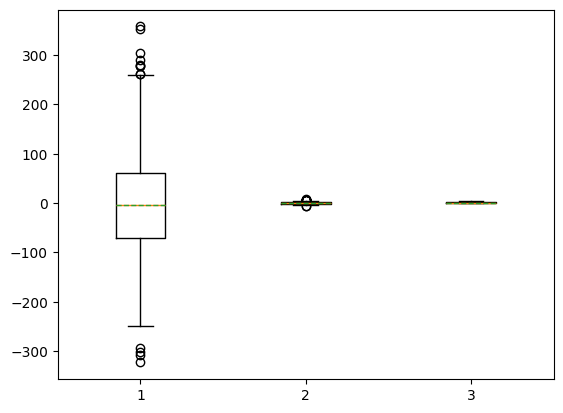

In [7]:
fig, ax = plt.subplots()
ax.boxplot((data['X1'],data['X2'],data['y']),showmeans=True, meanline= True)
plt.show()

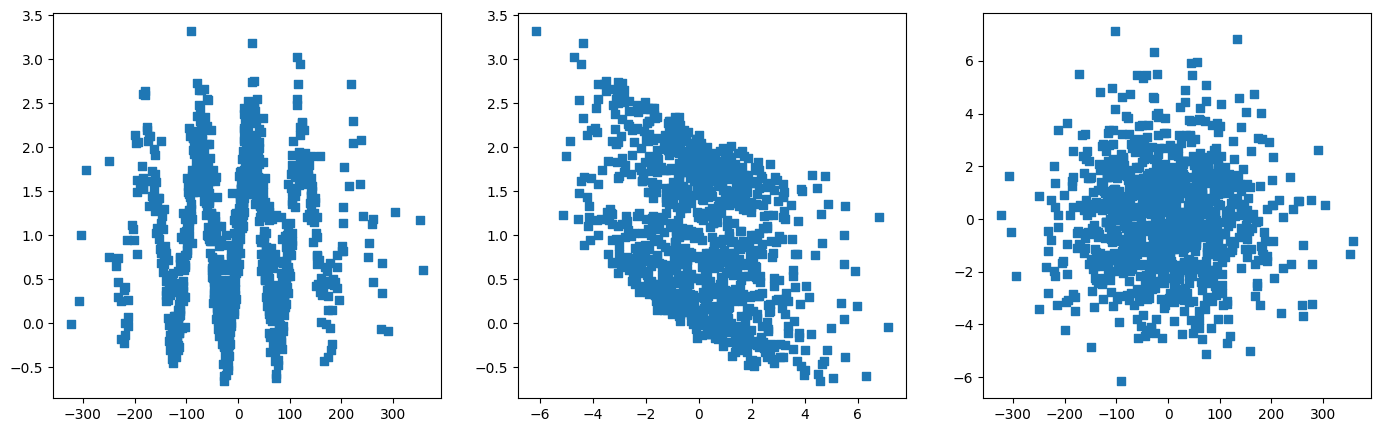

In [8]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize=(17,5))
ax1.scatter(data['X1'],data['y'],marker='s')
ax2.scatter(data['X2'],data['y'],marker='s')
ax3.scatter(data['X1'],data['X2'],marker='s')
plt.show()

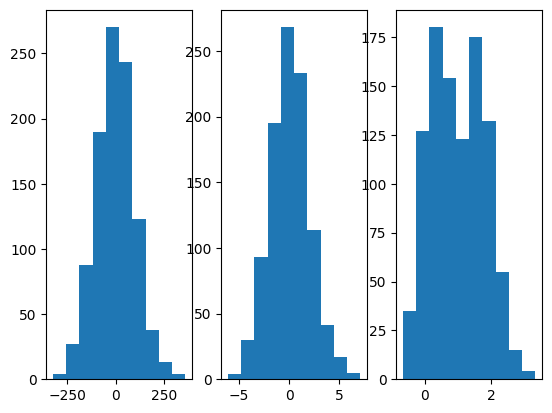

In [9]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3)
ax1.hist(data['X1'])
ax2.hist(data['X2'])
ax3.hist(data['y'])
plt.show()

[]

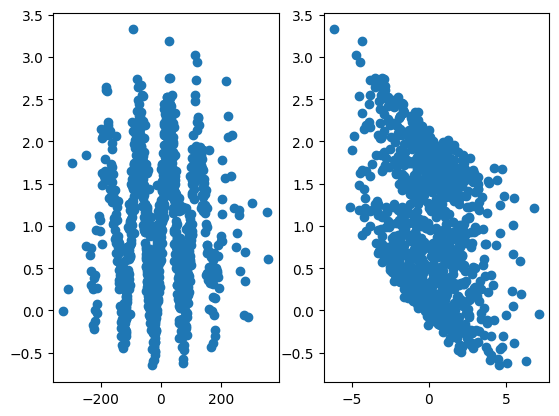

In [10]:
fig, axs = plt.subplots(1,2)
axs[0].scatter(data['X1'],data['y'])
axs[1].scatter(data['X2'],data['y'])
plt.plot()

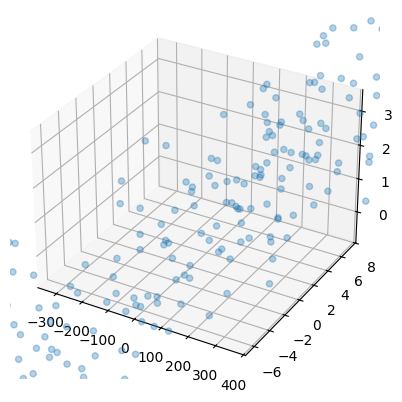

In [11]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(data['X1'],data['X2'],data['y'],zdir='x')
#ax.scatter(data['X1'],data['X2'],zs=0,zdir='x')
#ax.view_init(elev=50, azim=0, roll=0)

plt.show()

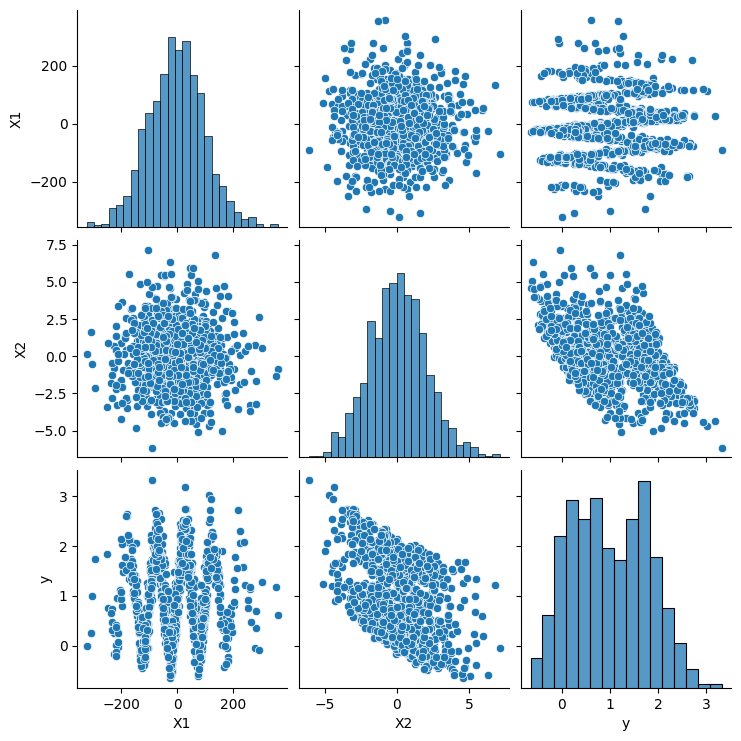

In [12]:
sns.pairplot(data)

In [13]:
corr_matrix = data.corr()
corr_matrix

,X1,X2,y
X1,1.000000,-0.009280,0.017148
X2,-0.009280,1.000000,-0.411762
y,0.017148,-0.411762,1.000000


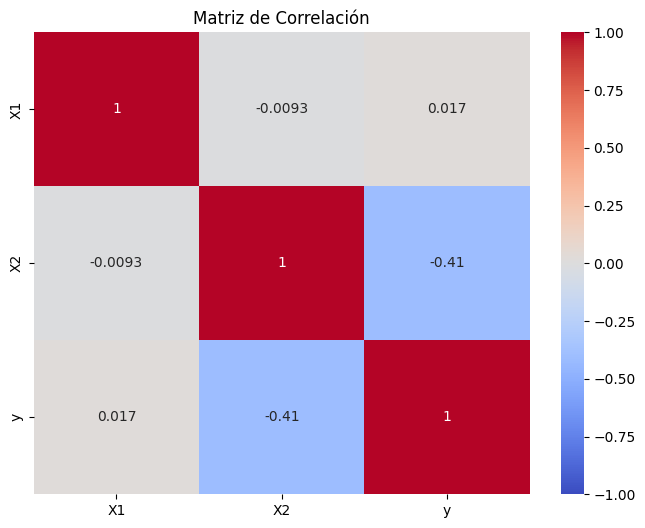

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

In [15]:
std = StandardScaler()
std_data= std.fit_transform(data)
pd_std = pd.DataFrame(std_data)

In [16]:
Std_X_train, Std_X_test, Std_y_train, Std_y_test = train_test_split(std_data[:,:2],std_data[:,2])
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,'X1':'X2'],data.loc[:,'y'])

In [17]:
#lr_nat = LinearRegression().fit(data.loc[:,'X1':'X2'],y=data.loc[:,'y'])
#lr_std = LinearRegression().fit(std_data[:,:2],y=std_data[:,2])
lr_nat = LinearRegression().fit(X_train,y_train)
lr_std = LinearRegression().fit(Std_X_train,Std_y_train)

In [18]:
lr_nat.score(X_test,y_test)

0.15071478980962993

In [19]:
lr_std.score(Std_X_test,Std_y_test)

0.1833080116197099

In [20]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.sin, validate=True)

In [21]:
#transformer.transform(data.loc[:,'X1'])
a = np.sin(data.loc[:,'X1'])

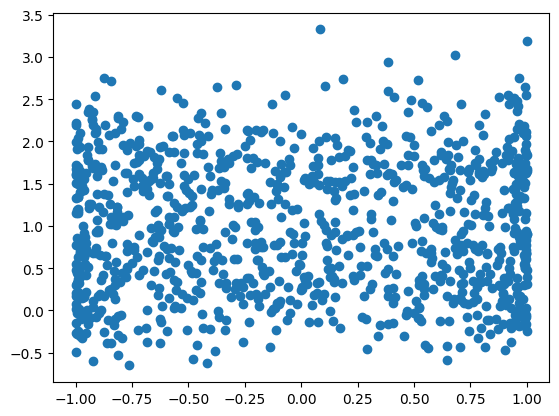

In [22]:
fig, ax = plt.subplots()
ax.scatter(a, data['y'])
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

Coefficients : 
 [ 0.00018631 -0.16623107]
Coefficients STD: 
 [ 0.03473949 -0.39949383]
Mean squared error: 0.54
Mean squared error STD: 0.82
Coefficient of determination: 0.15
Coefficient of determination STD: 0.18


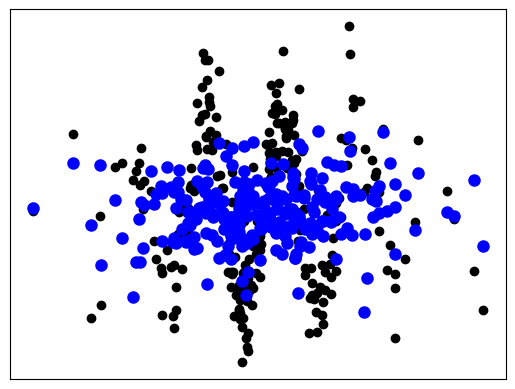

In [24]:
b = lr_nat.predict(X_test)
c = lr_std.predict(Std_X_test)
# The coefficients
print("Coefficients : \n", lr_nat.coef_)
print("Coefficients STD: \n", lr_std.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, b))
print("Mean squared error STD: %.2f" % mean_squared_error(Std_y_test, c))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, b))
print("Coefficient of determination STD: %.2f" % r2_score(Std_y_test, c))


# Plot outputs
plt.scatter(X_test['X1'], y_test, color="black")
plt.scatter(X_test['X1'],b, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

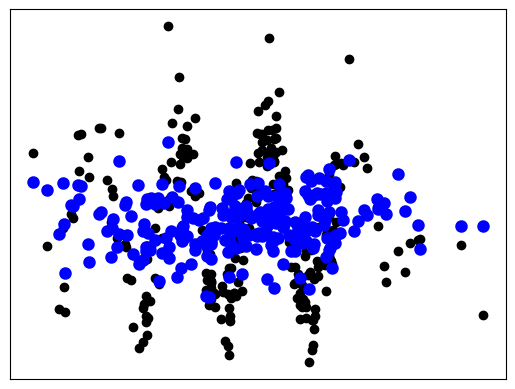

In [25]:
plt.scatter(Std_X_test[:,0], Std_y_test, color="black")
plt.scatter(Std_X_test[:,0],c, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [26]:
def wave(a,b,c,d,x):
    return a * np.sin(b*x+c) + d 

In [28]:
test = data.loc[:,'X1']

In [30]:
test = wave(2, 6.0, 1, 0, test)

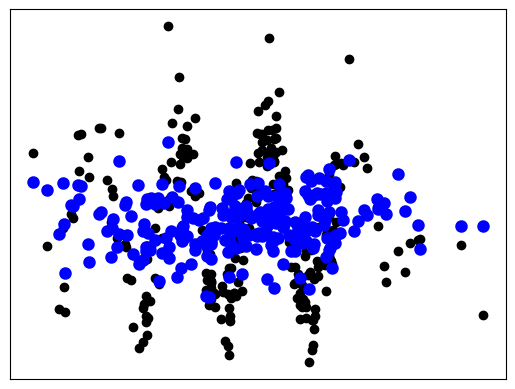

In [35]:
plt.scatter(Std_X_test[:,0], Std_y_test, color="black")
plt.scatter(Std_X_test[:,0],c, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

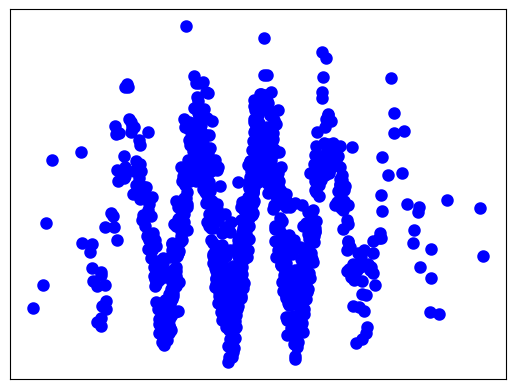

In [37]:
plt.scatter(data.loc[:,'X1'],data.loc[:,'y'], color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
Amplitud = 0
B = 0
Period = 2*np.pi/B
C

In [38]:
from scipy.optimize import curve_fit
def sinusoidal(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

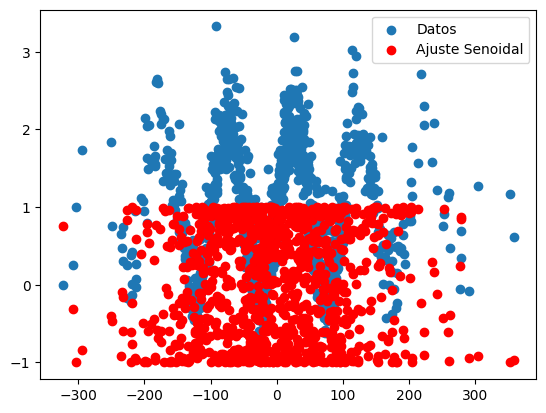

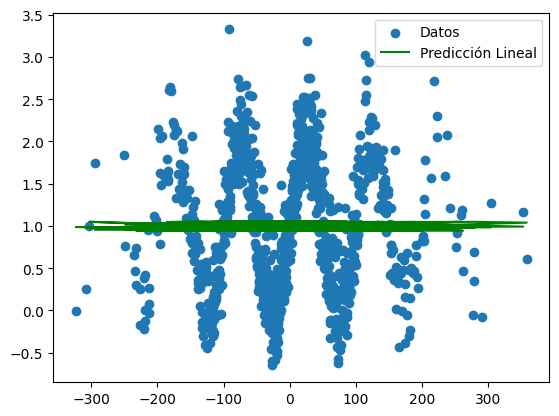

In [97]:
params, params_covariance = curve_fit(sinusoidal, data.loc[:,'X1'],data.loc[:,'y'], p0=[1, 1, 0, 0])

# Graficar los datos originales y el ajuste senoidal
plt.scatter(data.loc[:,'X1'],data.loc[:,'y'], label='Datos')
plt.scatter(data.loc[:,'X1'], sinusoidal(data.loc[:,'X1'], 1,6.0,0.0,0), label='Ajuste Senoidal', color='red')
plt.legend()
plt.show()

# Luego de obtener los parámetros (a, b, c, d), puedes transformar los datos para la regresión lineal
b_opt = params[1]
c_opt = params[2]

# Crear las variables transformadas
x_transformed_sin = np.sin(b_opt * data.loc[:,'X1'] + c_opt)
x_transformed_cos = np.cos(b_opt * data.loc[:,'X1'] + c_opt)

# Usar estas variables transformadas en una regresión lineal
from sklearn.linear_model import LinearRegression

X = np.column_stack([x_transformed_sin, x_transformed_cos])
X = np.column_stack([x_transformed_sin])
model = LinearRegression()
model.fit(X, data.loc[:,'y'])

# Predecir y graficar
y_pred = model.predict(X)
plt.scatter(data.loc[:,'X1'],data.loc[:,'y'], label='Datos')
plt.plot(data.loc[:,'X1'], y_pred, label='Predicción Lineal', color='green')
plt.legend()
plt.show()

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D  # Importa la herramienta 3D
from ipywidgets import interact, FloatSlider

In [59]:
def extract_and_normalize_column(data, column_name):
    if column_name in data.columns:
        column = data[column_name]
        normalized_column = (column - column.mean()) / column.std()
        return normalized_column
    else:
        raise ValueError(f"La columna '{column_name}' no existe en el DataFrame.")

ones = np.ones((len(data),1))
def funcion_theta_𝑗(h, thetas, y, aprendizaje=0.05, A=np.column_stack((ones*2,ones))):
    dJ = funcion_3_1_Gradiente(h, thetas, y, A)
    nuevo_theta = thetas - aprendizaje * dJ
    return nuevo_theta
def funcion_3_1_Gradiente(h, thetas, y, A):
    e = (h - y)
    dJ = (1 / (len(h))) * np.dot(A.T, e)
    return dJ
def funcion_2_Costo(h,theta,y):
    e=y-h# Calcula el vector de errores (diferencia entre las predicciones y los valores reales)
    J = (1 / (2*len(h))) * np.matmul(np.transpose(e), e)# Calcula la función de costo
    return J
def funcion_1_salida_𝐡𝜽(A,theta):
    h = np.matmul(A,theta)
    return h
@interact(aprendizaje=FloatSlider(value=00.12, min=0, max=1.5, step=0.005, description='alfa:'),
          lineal=FloatSlider(value=1, min=0, max=4, step=0.005, description='lineal:'),
         itera=FloatSlider(value=50, min=2, max=100, step=1.0, description='itera:'))
def todo(aprendizaje=0.12,itera=50,lineal=1):
    # Forma 1
        # Normalizar los datos
    x1 = extract_and_normalize_column(data, 'X1')
    x2 = extract_and_normalize_column(data, 'X2')
    #y  = extract_and_normalize_column(data, 'y')
    A  = np.column_stack((-x2+1.5,2.1*np.sin(6.0*x1+6.0),ones))   #con cosas que no sirven
    A  = np.column_stack((x2,np.sin(6.0*x1),ones))                #con lo que si afecto
     # Forma 2
    x  = (data.iloc[:, :-1].values - np.mean(data.iloc[:, :-1].values, axis=0)) / np.std(data.iloc[:, :-1].values, axis=0)
    y  = data.iloc[:, -1].values
    #A  = np.column_stack((-x[:, 1]+1.5,2.1*np.sin(6.0*x[:, 0]+6.0),ones))
    theta=np.random.rand(A.shape[1])

    #plt.scatter(x1,y,alpha=0.4,edgecolor='none')
    #plt.scatter(x[:, 0],y,alpha=0.4,edgecolor='none')

    #plt.scatter(x[:, 0],x1,alpha=0.4,edgecolor='none')
    #plt.scatter(x[:, 1],x2,alpha=0.4,edgecolor='none')

    
    acumulados=[]
    for i in range(int(itera)):
        h=funcion_1_salida_𝐡𝜽(A,theta)
        #print(h)
        J_Ref=funcion_2_Costo(h,theta,y)
        #print(J_Ref)
        acumulados.append(J_Ref)
        #print(acumulados)
        dJ=funcion_3_1_Gradiente(h,theta,y,A)
        #print(dJ)
        theta = funcion_theta_𝑗(h, theta, y, aprendizaje, A)
        #print(dJ)
    plt.figure()
    plt.plot(acumulados)
    plt.xlabel('Iteración')
    plt.ylabel('Costo ')
    plt.title(f"Costo con aprendizaje de {aprendizaje} iterando {itera} veces")
    plt.show()

    plt.scatter(data['X2'], data['y'],alpha=0.4,edgecolor='none')
    plt.scatter(data['X2'],h,alpha=0.4,edgecolor='none')
    plt.xlabel('X2')
    plt.ylabel('h')
    plt.title(f"Resultados del modelo en X2 con aprendizaje de {aprendizaje} iterando {itera} veces")
    plt.show()

    plt.scatter(data['X1'], data['y'],alpha=0.4,edgecolor='none')
    plt.scatter(data['X1'],h,alpha=0.4,edgecolor='none')
    plt.xlabel('X1')
    plt.ylabel('h')
    plt.title(f"Resultados del modelo en X1 con aprendizaje de {aprendizaje} iterando {itera} veces")
    plt.show()

interactive(children=(FloatSlider(value=0.12, description='alfa:', max=1.5, step=0.005), FloatSlider(value=50.…

In [76]:
x1 = extract_and_normalize_column(data, 'X1')


x2 = extract_and_normalize_column(data, 'X2')

y  = data.iloc[:, -1].values
#A  = np.column_stack((-x2+1.5,2.1*np.sin(6.0*x1+6.0),ones))   #con cosas que no sirven
A  = np.column_stack((x2,np.sin(6.0*x1),ones))  
model.fit(A,y)
pred = model.predict(A)
plt.scatter(data['X1'], data['y'],alpha=0.4,edgecolor='none')
plt.scatter(data['X1'],pred,alpha=0.4,edgecolor='none')

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

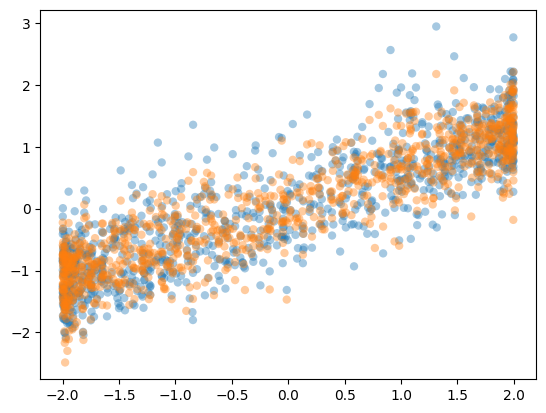

In [114]:
a = pd.DataFrame(data['X1'])
b = pd.DataFrame(data['X2'])
c = std.fit_transform(data)
x1 = std.fit_transform(a)
x2 = std.fit_transform(b)
#A  = np.column_stack((c[:,1],2.0*np.sin(6.0*c[:,0]+6)))  
c[:,0] = 2.0*np.sin(6.0*c[:,0]+6)
model.fit(A,c[:,2])
pred = model.predict(A)
plt.scatter(c[:,0], c[:,2],alpha=0.4,edgecolor='none')
plt.scatter(c[:,0],pred,alpha=0.4,edgecolor='none')

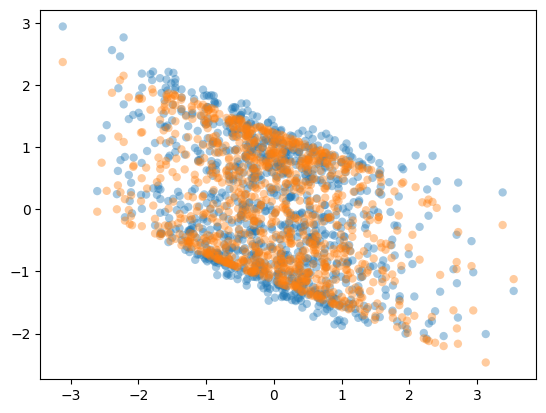

In [98]:
plt.scatter(c[:,1], c[:,2],alpha=0.4,edgecolor='none')
plt.scatter(c[:,1],pred,alpha=0.4,edgecolor='none')

In [110]:
c_frame = pd.DataFrame(c)
c_frame.head()
d = pd.DataFrame({'X1': c[:,0],'X2': c[:,1],'y': c[:,2]})
d

,X1,X2,y
0,0.571175,0.638014,-0.509174
1,1.869385,-0.707357,-0.620849
2,-2.229636,-0.438055,-0.939798
3,0.896180,-0.710052,-0.686926
4,0.351937,0.539758,0.914669
...,...,...,...
995,1.545586,1.990618,-0.723436
996,0.196944,0.742303,0.850031
997,-0.250516,-0.586917,-0.911363
998,1.186618,-0.163220,0.998039


In [111]:
# Valores de x para generar una función sinusoidal
val = np.linspace(min(c_frame[0]), max(c_frame[2]), 200)  # Valores de 0 a 2*pi para un ciclo completo
@interact(corrimiento=FloatSlider(value=6, min=0, max=10, step=1, description='corrimiento:'),
          frec=FloatSlider(value=6, min=0, max=7, step=1, description='frec:'),
          Sin_cos=FloatSlider(value=1, min=0, max=1, step=1, description='Sin_cos:'),
          Ampli=FloatSlider(value=2.1, min=1, max=3, step=0.1, description='Ampli:'),)
def grafica_1 (corrimiento,frec,Sin_cos,Ampli):
    plt.scatter(c_frame[0], c_frame[2], marker='o', s=30)
    # Crea un gráfico de dispersión con cos(val) en el eje X y 'y' en el eje Y
    if Sin_cos == 1:
        plt.scatter(val, Ampli*np.sin(frec*val+corrimiento), marker='o', s=30)
        plt.title(f'Datos en Altura_sin :{Ampli}sin({frec}*x+{corrimiento})')
        print((f'sin :{Ampli}np.sin({frec}*x+{corrimiento})'))
    else :
        plt.scatter(val, Ampli*np.cos(frec*val+corrimiento), marker='o', s=30)
        plt.title('Datos en Altura_cos')

    plt.xlabel('Data X1')
    plt.ylabel('Data y')

interactive(children=(FloatSlider(value=6.0, description='corrimiento:', max=10.0, step=1.0), FloatSlider(valu…

In [ ]:
@interact(a=FloatSlider(value=0, min=1, max=3, step=0.1, description='a'), b=FloatSlider(value=0, min=0, max=7, step=1, description='b'),
         c=FloatSlider(value=0, min=0, max=10, step=1, description='c'),d=FloatSlider(value=0, min=0, max=10, step=1, description='d'),)
def  (a,b,c,d):
    plt.scatter(std_data[:,0],std_data[:,2], marker='o', s=30)
    plt.scatter(modeling, a*np.sin(b*modeling+c)+d, marker='o', s=30, c='g')
    plt.title(f'Datos en Altura_sin :{a}sin({b}*x+{c})+{d}')
    print((f'sin :{a}np.sin({b}*x+{c})+{d}'))

    plt.xlabel('Data X1')
    plt.ylabel('Data y')
